In [146]:
%matplotlib widget

In [147]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np

In [148]:
plt.style.use("ggplot")

In [166]:
# Create: User Parameters
# path_results = "/Users/june/Documents/results/lightning/lightning_logs/version_7/

path_root = "/Users/june/Documents/results/RNNvsLSTM/CNN_LSTM/lightning_logs"

path_list = []
for i, ele in enumerate(os.listdir(path_root)):
    #if "version" in ele:
    #if ele in ["version_%s" % j for j in all_versions]:
    #    path_list.append(os.path.join(path_root, ele, "metrics.csv"))
    path_list.append(os.path.join(path_root, ele, "metrics.csv"))

path_list

['/Users/june/Documents/results/RNNvsLSTM/CNN_LSTM/lightning_logs/version_0/metrics.csv']

In [167]:
path_list

['/Users/june/Documents/results/RNNvsLSTM/CNN_LSTM/lightning_logs/version_0/metrics.csv']

In [168]:
def load_data(path):
    
    return pd.read_csv(path)

In [181]:
path_list

['/Users/june/Documents/results/RNNvsLSTM/CNN_LSTM/lightning_logs/version_0/metrics.csv']

In [183]:
data = load_data(path_list[0])

In [154]:
path_list[-7]

'/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_27/metrics.csv'

In [99]:
data['valid_emd_epoch'].unique()

array([       nan, 0.03253889, 0.03252758, 0.03251768, 0.03252116,
       0.03252508, 0.03252135, 0.03251686])

In [100]:
path=path_list[-7]

In [101]:
type(data)

pandas.core.frame.DataFrame

In [174]:
data

,epoch,lr-Adam,step,train_loss_epoch,train_loss_step,valid_MAE_epoch,valid_MAE_step,valid_MSE_epoch,valid_MSE_step,valid_emd_epoch,valid_emd_step,valid_loss_epoch,valid_loss_step
0,NaN,0.005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,0,NaN,0.906181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0,NaN,NaN,NaN,0.886412,NaN,0.869758,NaN,0.017725,NaN,0.869758
3,0.0,NaN,0,NaN,NaN,0.886412,NaN,0.869758,NaN,0.017725,NaN,0.869758,NaN
4,0.0,NaN,0,0.906181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,NaN,0.005,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,49.0,NaN,49,NaN,0.011528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,NaN,49,NaN,NaN,NaN,0.067958,NaN,0.022632,NaN,0.007025,NaN,0.022632
248,49.0,NaN,49,NaN,NaN,0.067958,NaN,0.022632,NaN,0.007025,NaN,0.022632,NaN


In [177]:
print("\n------ Column Names ------\n")
for ele in data.columns:
    
    print(ele)


------ Column Names ------

epoch
lr-Adam
step
train_loss_epoch
train_loss_step
valid_MAE_epoch
valid_MAE_step
valid_MSE_epoch
valid_MSE_step
valid_emd_epoch
valid_emd_step
valid_loss_epoch
valid_loss_step


In [175]:
def plot_data(x_vals, y_vals, title, 
              x_label, y_label, y_lim=None, 
              fig_size=(10, 5), font_size=14):

    fig, ax = plt.subplots(figsize=fig_size)

    ax.plot(x_vals, y_vals, linewidth=5)

    ax.set_title("%s" % title)
    ax.set_xlabel("%s" % x_label)
    ax.set_ylabel("%s" % y_label)

    if y_lim is not None:
        ax.set_ylim(y_lim)

    fig.tight_layout()

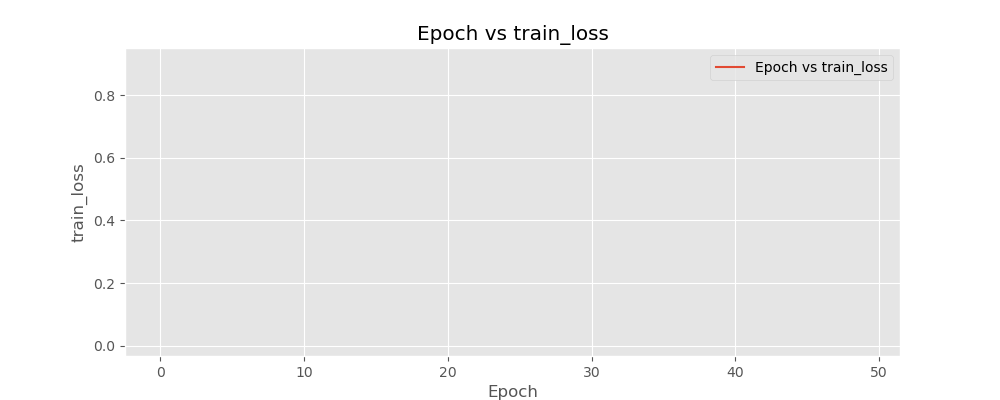

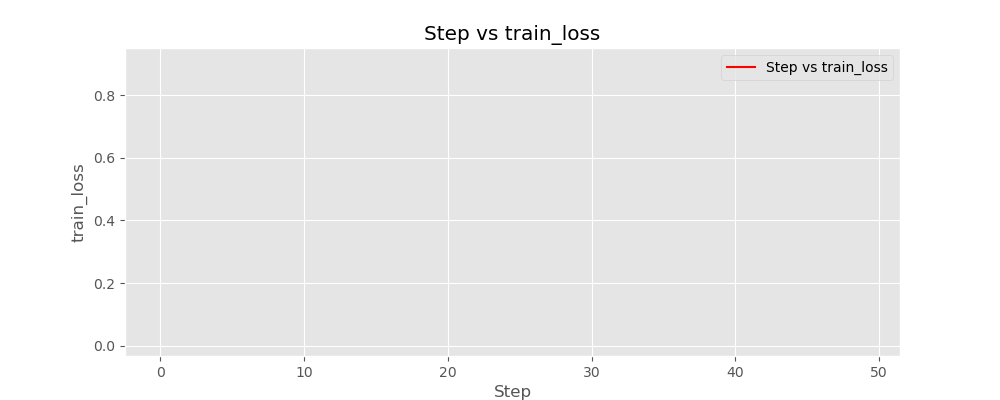

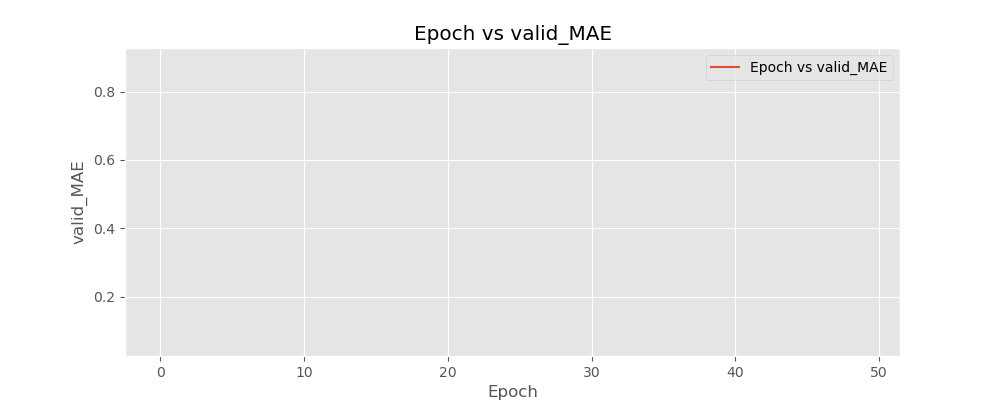

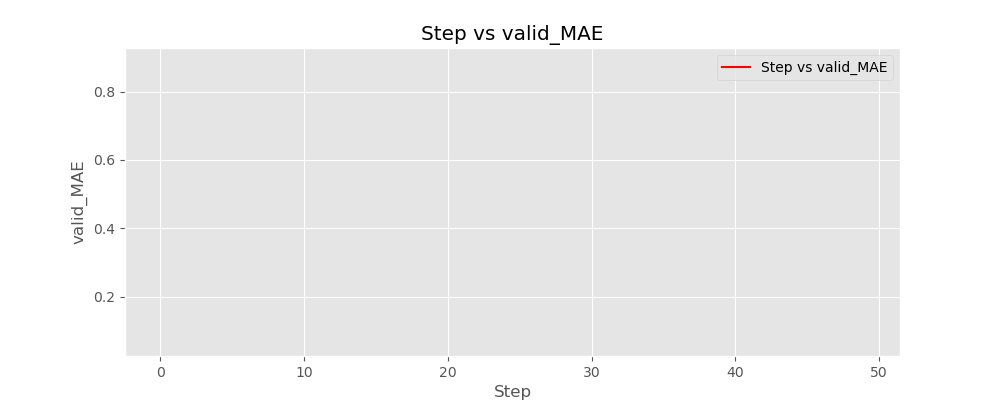

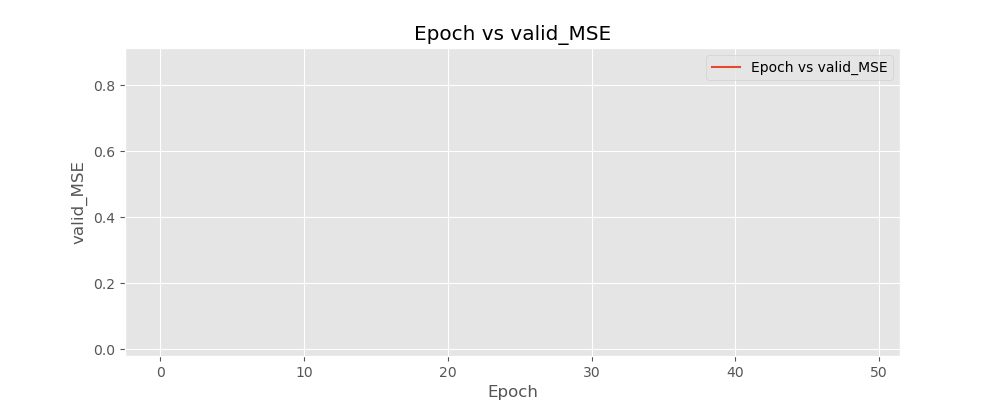

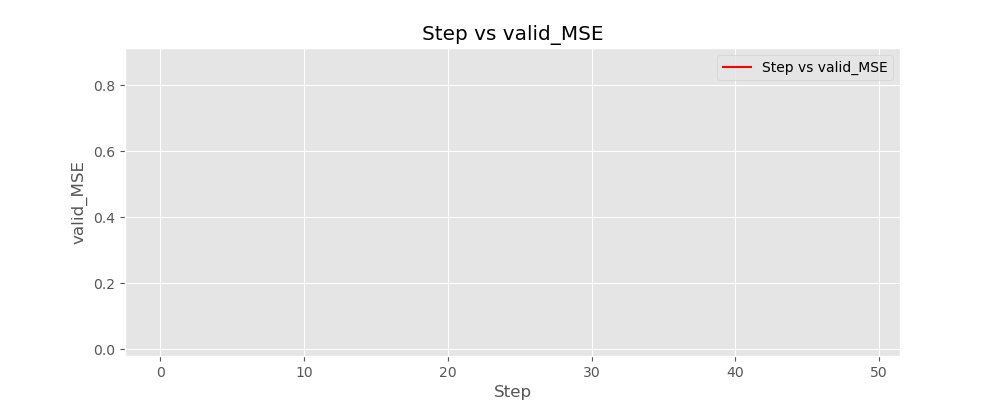

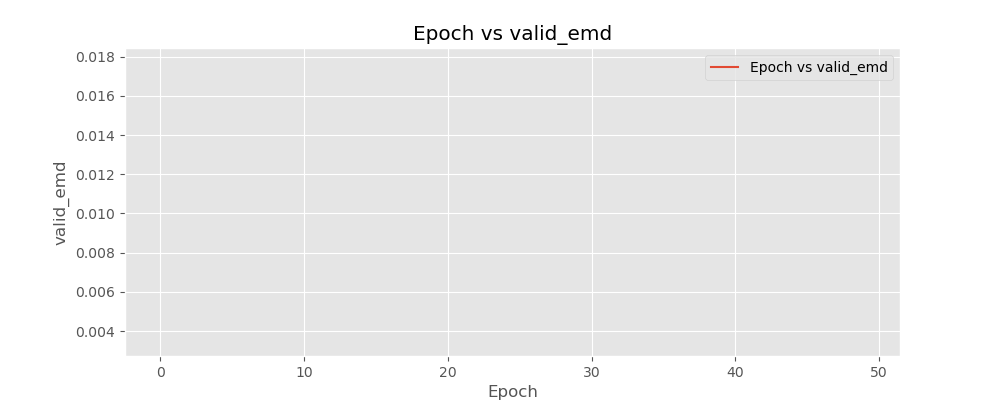

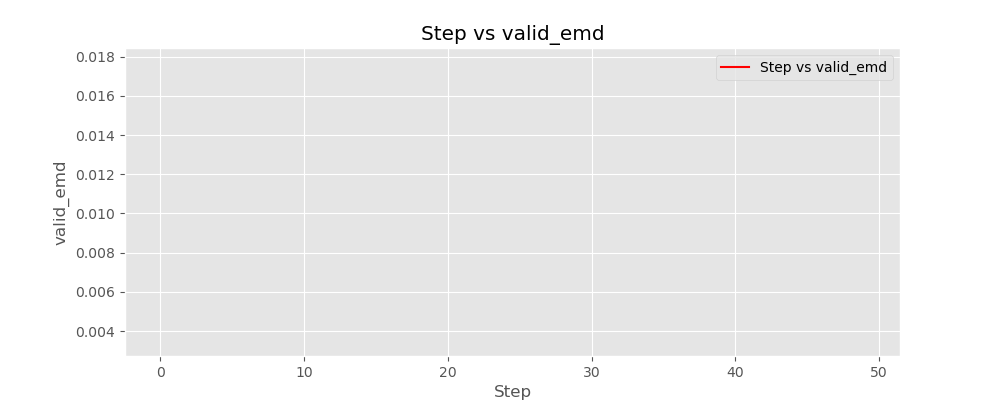

In [180]:
import matplotlib.pyplot as plt

# Define the measures based on the column names
measures = ['train_loss', 'valid_MAE', 'valid_MSE', 'valid_emd']

# Loop through each measure
for measure in measures:
    # Plot Epoch vs Measure
    plt.figure(figsize=(10, 4))
    plt.plot(data['epoch'], data[f'{measure}_epoch'], label=f'Epoch vs {measure}')
    plt.title(f'Epoch vs {measure}')
    plt.xlabel('Epoch')
    plt.ylabel(measure)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Step vs Measure
    plt.figure(figsize=(10, 4))
    plt.plot(data['step'], data[f'{measure}_step'], label=f'Step vs {measure}', color='r')
    plt.title(f'Step vs {measure}')
    plt.xlabel('Step')
    plt.ylabel(measure)
    plt.legend()
    plt.grid(True)
    plt.show()


In [107]:
# Convert 'epoch' to numeric and drop rows where 'epoch' is NaN
data['epoch'] = pd.to_numeric(data['epoch'], errors='coerce')
data.dropna(subset=['epoch'], inplace=True)

# Optionally, handle NaNs in measure columns, for example:
data['valid_emd_epoch'].fillna(method='ffill', inplace=True)  # forward fill as an example


/var/folders/xs/5688kgc54c12jm1b6pjmrldr0000gn/T/ipykernel_10780/2896581894.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['valid_emd_epoch'].fillna(method='ffill', inplace=True)  # forward fill as an example


In [110]:
measures

['valid_emd', 'valid_loss', 'valid_mae', 'valid_mse']

Plotting for valid_emd_epoch


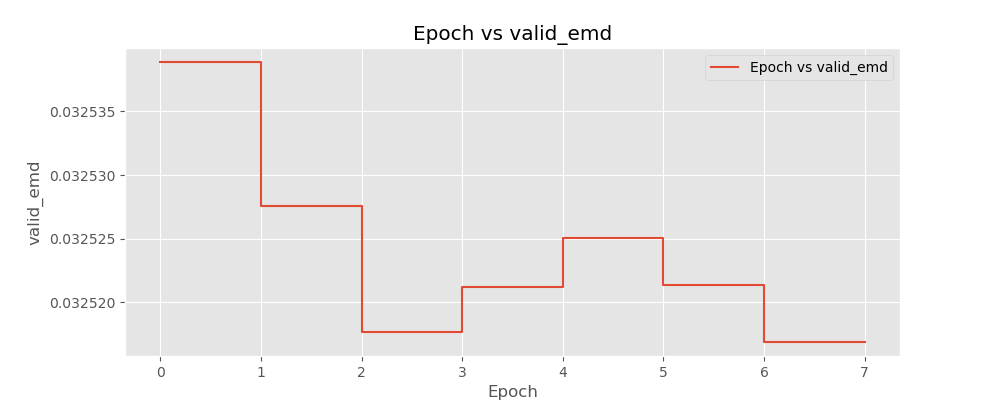

Plotting for valid_loss_epoch


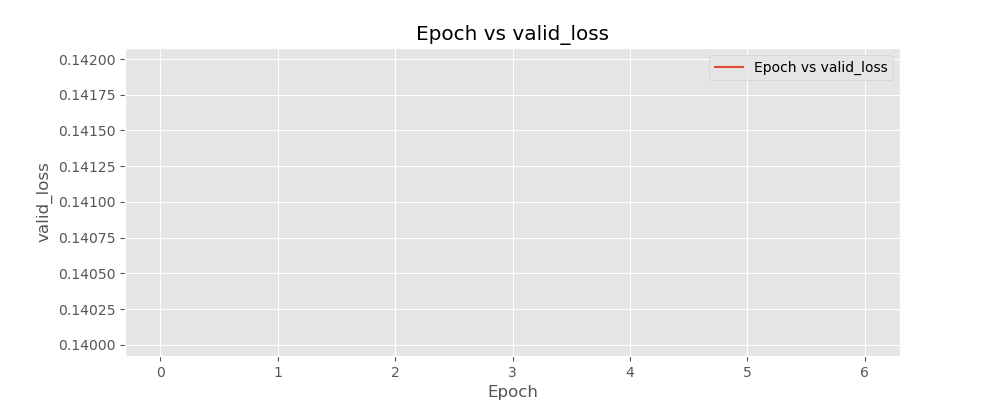

Plotting for valid_mae_epoch


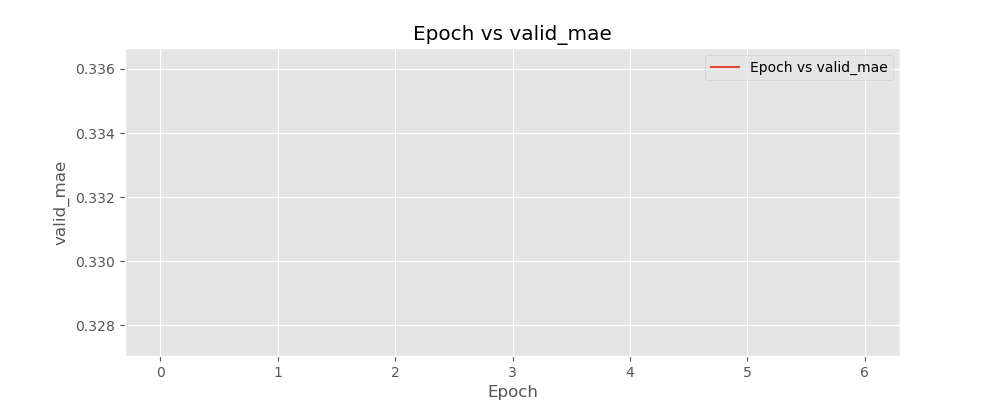

Plotting for valid_mse_epoch


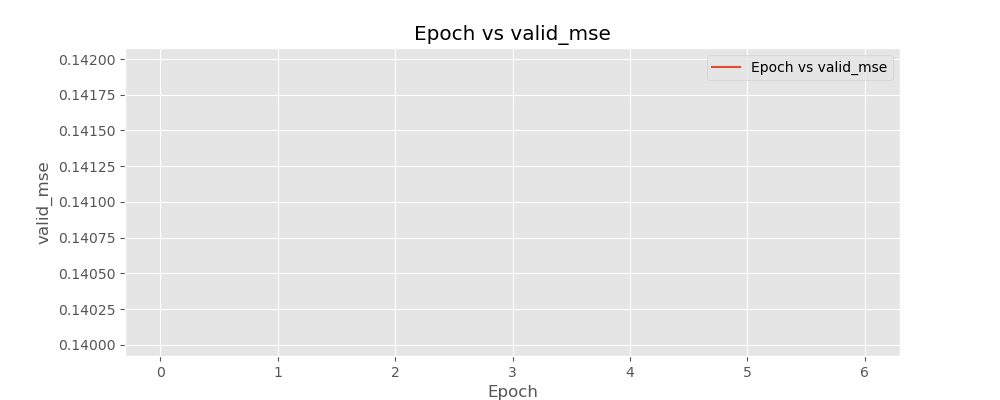

In [108]:
# Print columns being plotted
for measure in measures:
    print(f'Plotting for {measure}_epoch')
    if f'{measure}_epoch' in data.columns:
        plt.figure(figsize=(10, 4))
        plt.plot(data['epoch'], data[f'{measure}_epoch'], label=f'Epoch vs {measure}')
        plt.title(f'Epoch vs {measure}')
        plt.xlabel('Epoch')
        plt.ylabel(measure)
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Column {measure}_epoch not found in DataFrame.")


In [116]:
path_list = path_list[-7]

In [ ]:
path_

In [135]:
path_list[-7]

'/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_27/metrics.csv'

In [134]:
fold

(0, '/')

In [138]:
target_names = ["train_loss", "valid_MSE_epoch", "valid_MAE_epoch", "valid_emd_epoch"]


all_data = {name: [] for name in target_names}


data = load_data(fold)

ValueError: Invalid file path or buffer object type: <class 'tuple'>

In [140]:
print("\n------ Column Names ------\n")
for ele in data.columns:
    
    print(ele)


------ Column Names ------

epoch
lr-Adam
step
train_loss
valid_emd_epoch
valid_emd_step
valid_loss_epoch
valid_loss_step
valid_mae_epoch
valid_mae_step
valid_mse_epoch
valid_mse_step


In [143]:
target_names

['train_loss', 'valid_mse_epoch', 'valid_mae_epoch', 'valid_emd_epoch']

In [159]:
path_list

'/Users/june/Documents/results/RNNvsLSTM/dens_CNN_LSTM/lightning_logs/version_27/metrics.csv'

Column loss not found in DataFrame. Skipping train_loss
No data available for plotting train_loss


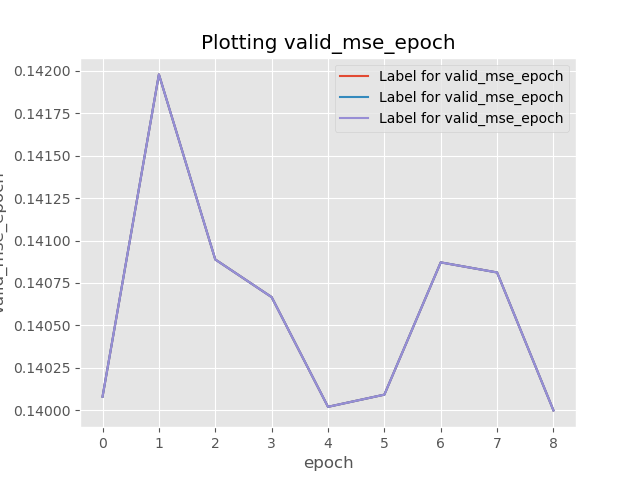

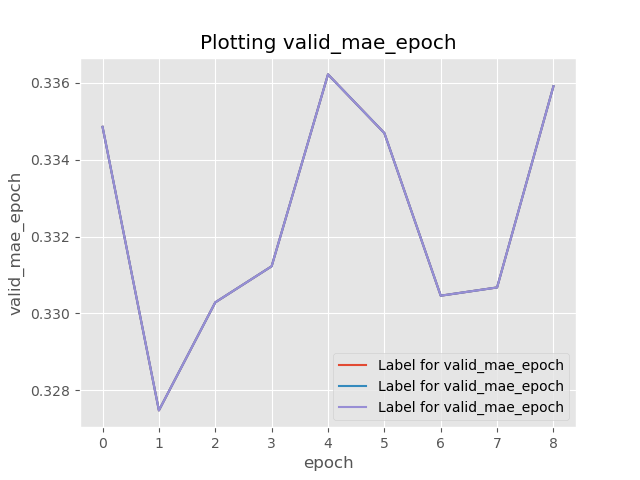

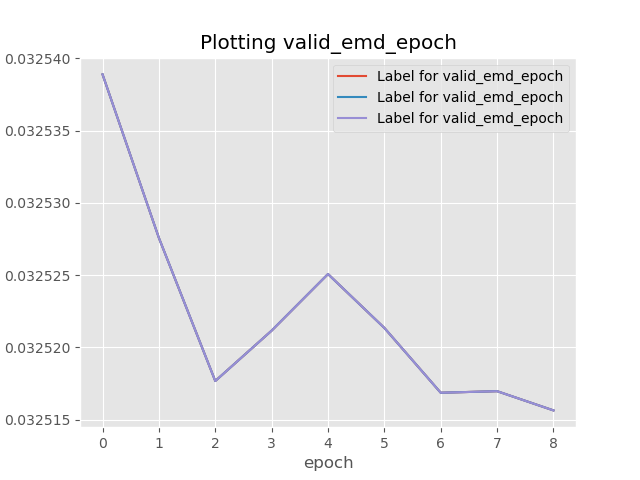

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'load_data' and 'path_list' are properly defined
data = load_data(path_list)  # Make sure this function and path_list are correctly set

for name in target_names:
    if name in data.columns:  # Check if target name is in DataFrame columns
        df = data.dropna(subset=[name])  # Drop NaN values in the current target column
        if "lr" in name:
            tag = "epoch"
            x_vals = list(range(df.shape[0]))
        else:
            tag = name.split("_")[-1]  # Get the suffix like 'epoch'
            if tag in df.columns:  # Check if this column exists
                x_vals = df[tag]
            else:
                print(f"Column {tag} not found in DataFrame. Skipping {name}")
                continue
        y_vals = df[name]
        all_data[name].append((x_vals, y_vals, 'Label for ' + name))
    else:
        print(f"Column {name} not found in DataFrame. Skipping {name}")

# Plotting the data
for name in target_names:
    if name in all_data and all_data[name]:  # Check if data exists for plotting
        plt.figure()
        plt.title(f"Plotting {name}")
        plt.xlabel("Epoch" if "lr" in name else name.split("_")[-1])
        plt.ylabel(name)
        for x_vals, y_vals, label in all_data[name]:
            plt.plot(x_vals, y_vals, label=label)
        plt.legend()
        plt.show()
    else:
        print(f"No data available for plotting {name}")


In [80]:
data.columns

Index(['lr-SGD', 'step', 'train_error_step', 'epoch', 'accuracy_step',
       'recall_step', 'valid_error_step', 'f1_step', 'precision_step',
       'accuracy_epoch', 'valid_error_epoch', 'f1_epoch', 'recall_epoch',
       'precision_epoch', 'train_error_epoch'],
      dtype='object')

In [81]:
data["epoch"].max()

99.0

In [82]:
path_list

['/Users/june/Documents/results/NNclass/lightning_logs/version_2/metrics.csv',
 '/Users/june/Documents/results/NNclass/lightning_logs/version_3/metrics.csv']

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (5).

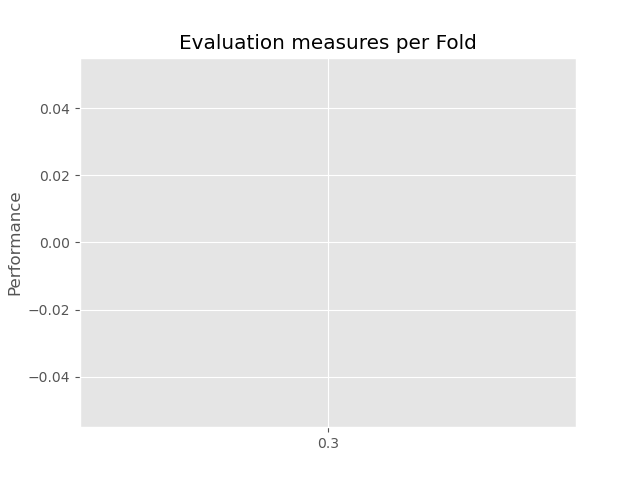

In [14]:
target_names = ["f1", "recall", "accuracy", "precision"]
results = []
x_vals = ("Fold1", "Fold2", "Fold3", "Fold4", "Fold5")

for fold in path_list:
    data = load_data(fold)
    metric_sums = {metric: 0 for metric in target_names}

    for metric in target_names:
        if f"{metric}_epoch" in data.columns:
            metric_sums[metric] += data[f"{metric}_epoch"].sum()
    
    averages = {metric: metric_sums[metric] / data["epoch"].max() for metric in target_names}
    results.append(averages)

x = np.arange(len(path_list))

fig, ax = plt.subplots()

width = 0.2
for i, metric in enumerate(target_names):
    metric_values = [result[metric] for result in results]
    rects = ax.bar(x + i * width, metric_values, width=width, label=metric)

ax.set_ylabel('Performance')
ax.set_title('Evaluation measures per Fold')
ax.set_xticks(x + 1.5 * width) 
ax.set_xticklabels(x_vals)
ax.legend(loc='upper left', bbox_to_anchor=(0.75, 1))

plt.show()

In [89]:
data['accuracy_epoch'].unique()

array([       nan, 0.45833334, 0.77500004, 1.        ])